# Marked Point Pattern

In addition to the [unmarked point pattern](pointpattern.ipynb), non-binary attributes might be associated with each point, leading to the so-called marked point pattern. The charactertistics of a marked point pattern are:

* Location pattern of the events are of interest
* Stochastic attribute attached to the events is of interest

Unmarked point pattern can be modified to be a marked point pattern using the method **add_marks** while the method **explode** could decompose a marked point pattern into a sequence of unmarked point patterns. Both methods belong to the class **PointPattern**.

In [49]:
from pysal.contrib.points.process import PoissonPointProcess, PoissonClusterPointProcess
from pysal.contrib.points.window import Window, poly_from_bbox
from pysal.contrib.points.pointpattern import PointPattern
import pysal as ps
from pysal.contrib import shapely_ext
#import shapely
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
# open the virginia polygon shapefile
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [51]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

In [52]:
window.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [53]:
window.centroid

(-78.85183583334933, 37.51851209850039)

In [54]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)

In [55]:
csr = PointPattern(samples.realizations[0])

In [56]:
cx, cy = window.centroid

In [57]:
cx

-78.85183583334933

In [58]:
cy

37.51851209850039

In [59]:
west = csr.points.x < cx
south = csr.points.y < cy
east = 1 - west
north = 1 - south

#### Create an attribute named quad which has a value for each event.

In [60]:
quad = 1 * east * north +  2 * west * north + 3 * west * south + 4 * east * south

In [61]:
type(quad)

pandas.core.series.Series

In [62]:
quad

0      3
1      3
2      2
3      1
4      4
5      4
6      4
7      3
8      1
9      1
10     3
11     3
12     1
13     2
14     1
15     4
16     4
17     4
18     4
19     4
20     4
21     1
22     3
23     4
24     4
25     1
26     4
27     1
28     1
29     3
      ..
170    4
171    1
172    2
173    3
174    1
175    3
176    1
177    3
178    2
179    2
180    4
181    1
182    4
183    1
184    4
185    2
186    2
187    3
188    3
189    2
190    1
191    3
192    4
193    1
194    3
195    3
196    1
197    1
198    3
199    3
dtype: int64

#### Attach the attribute quad to the point pattern 

In [63]:
csr.add_marks([quad], mark_names=['quad'])

In [64]:
csr.df

,x,y,quad
0,-82.364084,37.164776,3
1,-82.675551,36.746718,3
2,-79.356015,37.714839,2
3,-78.414304,37.936527,1
4,-78.547043,36.977961,4
5,-78.528684,37.244047,4
6,-76.649082,36.917415,4
7,-80.930822,37.188551,3
8,-77.895256,38.772231,1
9,-78.616262,38.004806,1


#### Explode a marked point pattern into a sequence of individual point patterns. Since the mark quad has 4 unique values, the sequence will be of length 4.

In [66]:
csr_q = csr.explode('quad')

In [67]:
len(csr_q)

4

In [68]:
csr

In [69]:
csr.summary()

Point Pattern
200 points
Bounding rectangle [(-82.9883966975,36.5574740583), (-75.6999144984,39.2726634338)]
Area of window: 19.7896094307
Intensity estimate for window: 10.1063136542
           x          y  quad
0 -82.364084  37.164776     3
1 -82.675551  36.746718     3
2 -79.356015  37.714839     2
3 -78.414304  37.936527     1
4 -78.547043  36.977961     4


#### Plot the 4 individual sequences

In [71]:
plt.xlim?

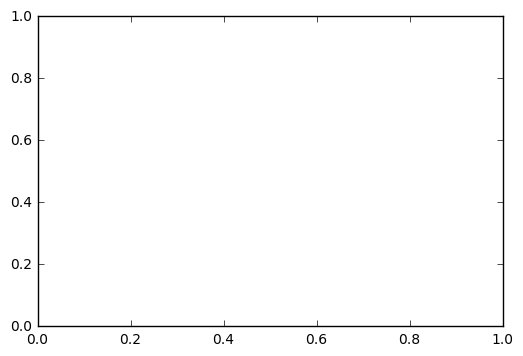

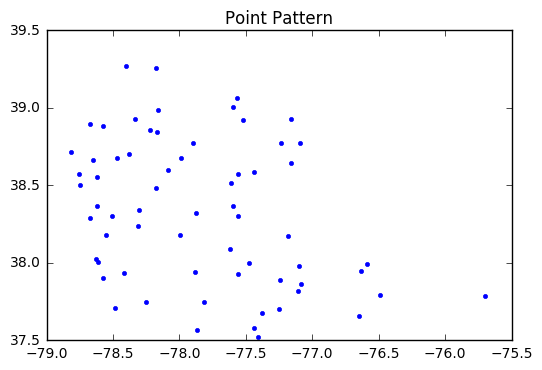

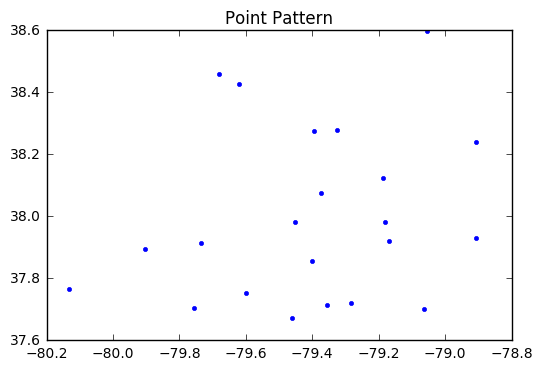

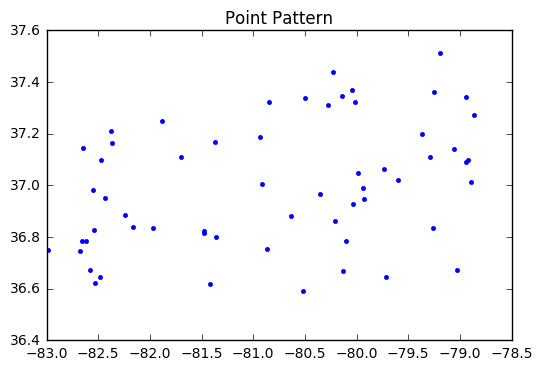

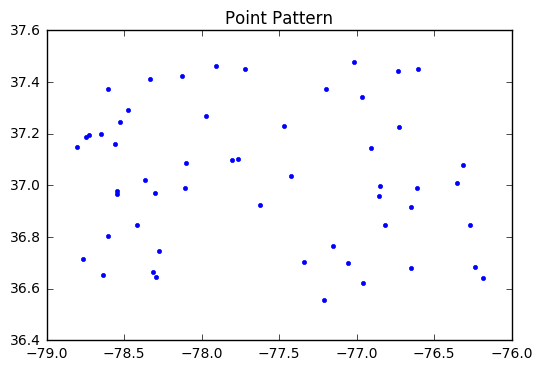

In [70]:
plt.xlim()
for ppn in csr_q:
    ppn.plot()

#### Plot the 4 unmarked point patterns using the same axes for a convenient comparison of locations

In [72]:
x0, y0, x1, y1 = csr.mbb
ylim = (y0, y1)
xlim = (x0, x1)

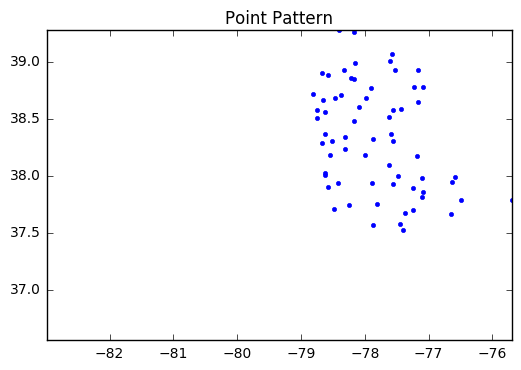

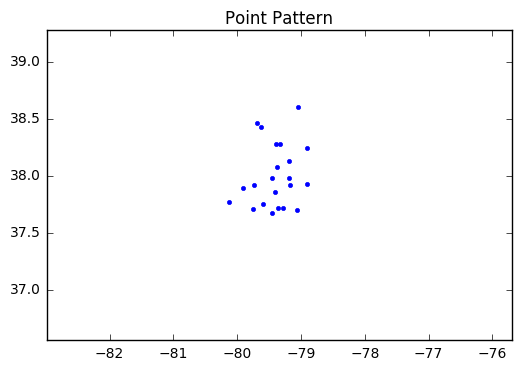

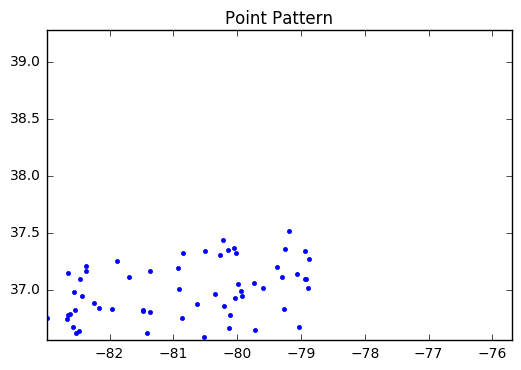

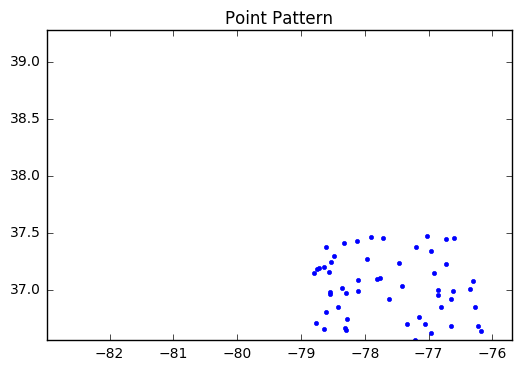

In [73]:
for ppn in csr_q:
    ppn.plot()
    plt.xlim(xlim)
    plt.ylim(ylim)